In [432]:
import pandas as pd

In [433]:
data = pd.read_csv("creditcard.csv")

## Understanding the data

In [434]:
data.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [435]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [436]:
data.isnull().count()

step              6362620
type              6362620
amount            6362620
nameOrig          6362620
oldbalanceOrg     6362620
newbalanceOrig    6362620
nameDest          6362620
oldbalanceDest    6362620
newbalanceDest    6362620
isFraud           6362620
isFlaggedFraud    6362620
dtype: int64

In [437]:
data.shape

(6362620, 11)

**Hence, we have no NULL values or missing values in the dataset**

In [438]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [439]:
data['type'].nunique()

5

In [440]:
data['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [441]:
data['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

Hence, **type** is a Nominal data with cardinality of 5. So we will use "One Hot Encoding" 

In [442]:
data['nameOrig'].nunique()

6353307

In [443]:
data['nameDest'].nunique()

2722362

Categorical Columns - 
1. type - The type of transaction can be 'PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'.
2. nameOrig - The customer who initialised the transaction.
3. nameDest - The customer who is the recepient.

Numerical Columns - 
1. Amount - Transaction amount
2. oldbalanceOrig - Balance before transaction 
3. newbalanceOrig - Balance after transaction
4. oldbalanceDest - Balance before transaction of receipent 
5. newbalanceDest - Balance after transaction of receipent
6. isFraud - Transactions that are actually made by fraudulent agents 
7. isFlaggedFraud - Transactions that are considered as frauds which may or may not be.

## EDA and Feature Engineering

In [444]:
data["isFraud"].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

<AxesSubplot:xlabel='isFraud', ylabel='count'>

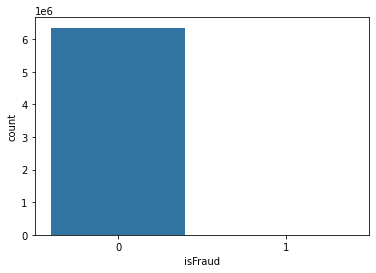

In [445]:
import seaborn as sns
sns.countplot(x = "isFraud", data = data)

### isFlaggedFraud Column

In [446]:
data.value_counts(["isFraud", "isFlaggedFraud"])

isFraud  isFlaggedFraud
0        0                 6354407
1        0                    8197
         1                      16
dtype: int64

Hence, 6354407 + 16 = 6354423 records were correctly flagged but 8197 records which are actually fraud transactions were not flagged by the system.

But this means we are not getting much information from isFlaggedFraud as there are only 16 occurences when its set. 

<AxesSubplot:>

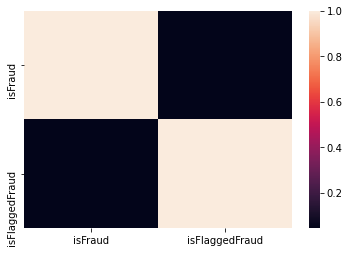

In [447]:
sns.heatmap(data[["isFraud", "isFlaggedFraud"]].corr())

Alongwith that corr between isFraud and isFlaggedFraud negligible. Hence we can drop this columns

In [448]:
data.drop(["isFlaggedFraud"], axis = 1, inplace = True)

In [449]:
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1


### nameOrig & nameDest Column

In [450]:
isFraud_data = data[data["isFraud"] == 1]

In [451]:
isFraud_data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1


In [452]:
isFraud_data.shape

(8213, 10)

In [453]:
data["nameOrig"].nunique()

6353307

In [454]:
data["nameDest"].nunique()

2722362

In [455]:
isFraud_data["nameOrig"].nunique()

8213

In [456]:
isFraud_data["nameDest"].nunique()

8169

In [457]:
(8213 - 8169)/8213

0.005357360282478997

Hence, nameOrig and nameDest isn't affecting target variable. So, dropping these variables

In [458]:
data.drop(["nameOrig", "nameDest"], axis = 1, inplace = True)

### Type Column

In [459]:
isFraud_data["type"].unique()

array(['TRANSFER', 'CASH_OUT'], dtype=object)

Hence, let's make all other categories as "OTHER"

In [460]:
others = ['PAYMENT', 'DEBIT', 'CASH_IN']

In [461]:
data.type.replace(others, "OTHER", inplace = True)

In [462]:
data

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,OTHER,9839.64,170136.00,160296.36,0.00,0.00,0
1,1,OTHER,1864.28,21249.00,19384.72,0.00,0.00,0
2,1,TRANSFER,181.00,181.00,0.00,0.00,0.00,1
3,1,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1
4,1,OTHER,11668.14,41554.00,29885.86,0.00,0.00,0
...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,1


In [463]:
data.type.value_counts()

OTHER       3592211
CASH_OUT    2237500
TRANSFER     532909
Name: type, dtype: int64

In [464]:
data_type = pd.get_dummies(data.type, prefix='type', drop_first = True)
data.drop("type", axis = 1, inplace = True)
data = data.join(data_type)

In [465]:
data.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_OTHER,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,1,0


### Balance and Amount Columns

We know that there are errors in the balance, so let's create a column that contains this data

In [466]:
data["errorbalanceOrg"] = data.newbalanceOrig + data.amount - data.oldbalanceOrg
data["errorbalanceDest"] = data.oldbalanceDest + data.amount - data.newbalanceDest

In [467]:
data

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_OTHER,type_TRANSFER,errorbalanceOrg,errorbalanceDest
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,1,0,0.0,9.839640e+03
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,1,0,0.0,1.864280e+03
2,1,181.00,181.00,0.00,0.00,0.00,1,0,1,0.0,1.810000e+02
3,1,181.00,181.00,0.00,21182.00,0.00,1,0,0,0.0,2.136300e+04
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,1,0,0.0,1.166814e+04
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,1,0,0,0.0,0.000000e+00
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,1,0,1,0.0,6.311409e+06
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0,0,0.0,1.000000e-02
6362618,743,850002.52,850002.52,0.00,0.00,0.00,1,0,1,0.0,8.500025e+05


In [468]:
data[data["errorbalanceOrg"] != 0.0]

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_OTHER,type_TRANSFER,errorbalanceOrg,errorbalanceDest
8,1,4024.36,2671.00,0.00,0.00,0.00,0,1,0,1353.36,4024.36
10,1,9644.94,4465.00,0.00,10845.00,157982.12,0,1,0,5179.94,-137492.18
13,1,11633.76,10127.00,0.00,0.00,0.00,0,1,0,1506.76,11633.76
15,1,229133.94,15325.00,0.00,5083.00,51513.44,0,0,0,213808.94,182703.50
16,1,1563.82,450.00,0.00,0.00,0.00,0,1,0,1113.82,1563.82
...,...,...,...,...,...,...,...,...,...,...,...
6362321,718,186273.84,168046.00,0.00,24893.67,211167.51,0,0,0,18227.84,0.00
6362322,718,82096.45,13492.00,0.00,0.00,82096.45,0,0,1,68604.45,0.00
6362460,730,10000000.00,17316255.05,17316255.05,0.00,0.00,1,0,1,10000000.00,10000000.00
6362462,730,7316255.05,17316255.05,17316255.05,0.00,0.00,1,0,1,7316255.05,7316255.05


In [469]:
data[data["errorbalanceDest"] != 0.0]

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_OTHER,type_TRANSFER,errorbalanceOrg,errorbalanceDest
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,1,0,0.0,9.839640e+03
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,1,0,0.0,1.864280e+03
2,1,181.00,181.00,0.00,0.00,0.00,1,0,1,0.0,1.810000e+02
3,1,181.00,181.00,0.00,21182.00,0.00,1,0,0,0.0,2.136300e+04
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,1,0,0.0,1.166814e+04
...,...,...,...,...,...,...,...,...,...,...,...
6362614,743,339682.13,339682.13,0.00,0.00,0.00,1,0,1,0.0,3.396821e+05
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,1,0,1,0.0,6.311409e+06
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0,0,0.0,1.000000e-02
6362618,743,850002.52,850002.52,0.00,0.00,0.00,1,0,1,0.0,8.500025e+05


In [470]:
isFraud_data = data[data["isFraud"] == 1]
isValid_data = data[data["isFraud"] == 0]

In [471]:
print("Proportion of fraudulent transactions with errorBalanceDest > 0: ", len(isFraud_data[isFraud_data.errorbalanceDest > 0])/len(isFraud_data))
print("Proportion of valid transactions with errorBalanceDest > 0: ", len(isValid_data[isValid_data.errorbalanceDest > 0])/len(isValid_data))
print("Proportion of fraudulent transactions with errorBalanceOrg > 0: ", len(isFraud_data[isFraud_data.errorbalanceOrg > 0])/len(isFraud_data))
print("Proportion of valid transactions with errorBalanceOrg > 0: ", len(isValid_data[isValid_data.errorbalanceOrg > 0])/len(isValid_data))

Proportion of fraudulent transactions with errorBalanceDest > 0:  0.5712894192134421
Proportion of valid transactions with errorBalanceDest > 0:  0.6413928160408988
Proportion of fraudulent transactions with errorBalanceOrg > 0:  0.006331425788384269
Proportion of valid transactions with errorBalanceOrg > 0:  0.8036598851789003


1. Most of the transactions where errorbalanceDest > 0 has high chance of being fraud
2. Valid transactions are most likely to have errorbalanceOrig > 0

### Step Column

step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

If we want to see per day, we need a bin of size 24 hours. 

In [472]:
import matplotlib.pyplot as plt

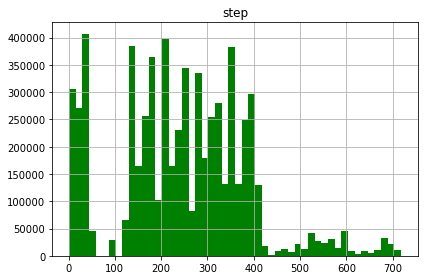

In [473]:
isValid_data.hist(column = "step", color = "green", bins = 50)
plt.tight_layout()

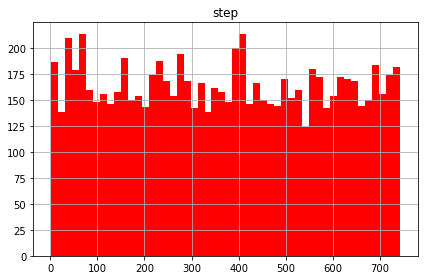

In [474]:
isFraud_data.hist(column = "step", color = "red", bins = 50)
plt.tight_layout()

**Days of Week**

In [475]:
isFraud_data_days = isFraud_data.step % 7
isValid_data_days = isValid_data.step % 7

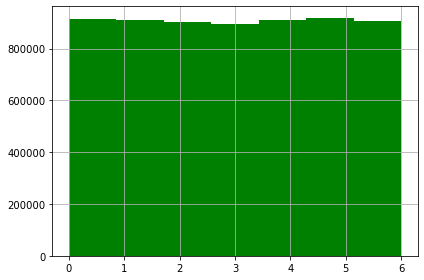

In [476]:
isValid_data_days.hist(color = "green", bins = 7)
plt.tight_layout()

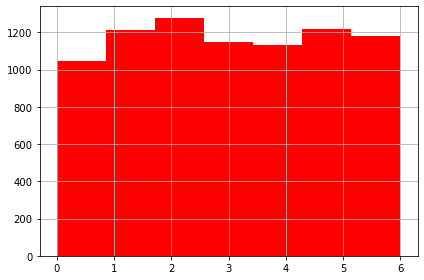

In [477]:
isFraud_data_days.hist(color = "red", bins = 7)
plt.tight_layout()

Hence, we can say day of week doesn't effect the Fraud

**Hour of day**

In [478]:
isFraud_data_hr = isFraud_data.step % 24
isValid_data_hr = isValid_data.step % 24

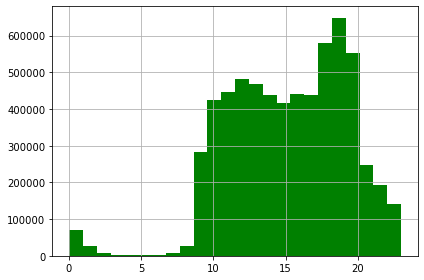

In [479]:
isValid_data_hr.hist(color = "green", bins = 24)
plt.tight_layout()

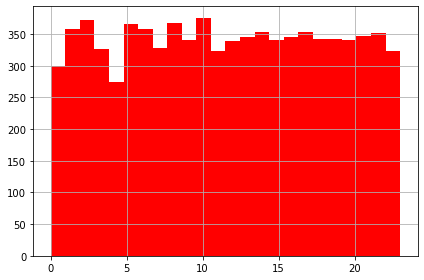

In [480]:
isFraud_data_hr.hist(color = "red", bins = 24)
plt.tight_layout()

The time of day seems to affect the isFraud column, hence creating a new column with this data

In [481]:
data["HourOfTheDay"] = data["step"] % 24

Per hour of a day of a week of a month, we have only one occurance hence it can't be used to generalize anything. So, dropping "step" column.

In [482]:
data.drop("step", axis = 1, inplace = True)

In [483]:
data

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_OTHER,type_TRANSFER,errorbalanceOrg,errorbalanceDest,HourOfTheDay
0,9839.64,170136.00,160296.36,0.00,0.00,0,1,0,0.0,9.839640e+03,1
1,1864.28,21249.00,19384.72,0.00,0.00,0,1,0,0.0,1.864280e+03,1
2,181.00,181.00,0.00,0.00,0.00,1,0,1,0.0,1.810000e+02,1
3,181.00,181.00,0.00,21182.00,0.00,1,0,0,0.0,2.136300e+04,1
4,11668.14,41554.00,29885.86,0.00,0.00,0,1,0,0.0,1.166814e+04,1
...,...,...,...,...,...,...,...,...,...,...,...
6362615,339682.13,339682.13,0.00,0.00,339682.13,1,0,0,0.0,0.000000e+00,23
6362616,6311409.28,6311409.28,0.00,0.00,0.00,1,0,1,0.0,6.311409e+06,23
6362617,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0,0,0.0,1.000000e-02,23
6362618,850002.52,850002.52,0.00,0.00,0.00,1,0,1,0.0,8.500025e+05,23


Still there is one issue, the data is highly skewed. Hence let's use undersampling. We still need to make sure that the Valid data is more so as to match the real time scenario. So decreasing such that they are in 3:1 ratio.

In [484]:
temp_fraud = data[data["isFraud"] == 1]

In [485]:
temp_valid = data[data["isFraud"] == 0].sample(n = 24639)

In [486]:
temp = pd.concat([temp_valid, temp_fraud])

In [487]:
temp.sort_index(inplace = True)

In [488]:
temp.reset_index(inplace = True)
temp.drop("index", axis = 1, inplace = True)

## Model Development

In [489]:
from random import seed,sample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [490]:
seed(21)

In [491]:
X = temp.drop(["isFraud"], axis = 1)

In [492]:
X

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_OTHER,type_TRANSFER,errorbalanceOrg,errorbalanceDest,HourOfTheDay
0,181.00,181.00,0.0,0.00,0.00,0,1,0.00,1.810000e+02,1
1,181.00,181.00,0.0,21182.00,0.00,0,0,0.00,2.136300e+04,1
2,125872.53,0.00,0.0,348512.00,3420103.09,0,1,125872.53,-2.945719e+06,1
3,2806.00,2806.00,0.0,0.00,0.00,0,1,0.00,2.806000e+03,1
4,2806.00,2806.00,0.0,26202.00,0.00,0,0,0.00,2.900800e+04,1
...,...,...,...,...,...,...,...,...,...,...
32847,339682.13,339682.13,0.0,0.00,339682.13,0,0,0.00,0.000000e+00,23
32848,6311409.28,6311409.28,0.0,0.00,0.00,0,1,0.00,6.311409e+06,23
32849,6311409.28,6311409.28,0.0,68488.84,6379898.11,0,0,0.00,1.000000e-02,23
32850,850002.52,850002.52,0.0,0.00,0.00,0,1,0.00,8.500025e+05,23


In [493]:
Y = temp.isFraud

In [494]:
Y

0        1
1        1
2        0
3        1
4        1
        ..
32847    1
32848    1
32849    1
32850    1
32851    1
Name: isFraud, Length: 32852, dtype: int64

In [495]:
set(Y)

{0, 1}

In [496]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [497]:
scaler = StandardScaler()

In [498]:
scaler.fit(X_train)

StandardScaler()

In [499]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [500]:
X_train

array([[-0.31624933, -0.33154326, -0.24808457, ..., -0.20172959,
        -0.21529114,  1.05797163],
       [ 0.28890323, -0.33154326, -0.24808457, ...,  1.58864607,
        -0.21529114,  0.12338996],
       [-0.3549535 , -0.32749009, -0.24406455, ..., -0.31966331,
        -0.21374532, -0.06352638],
       ...,
       [-0.07690103, -0.20283725, -0.24808457, ..., -0.31966331,
         0.15749438,  1.05797163],
       [-0.29019387,  1.12601605,  1.45148025, ...,  0.07037703,
        -1.64962073, -0.43735905],
       [-0.15897248, -0.30092494, -0.24808457, ...,  0.06706836,
        -0.21529114, -0.43735905]])

In [501]:
from sklearn.metrics import log_loss, confusion_matrix

In [502]:
!pip install imblearn --user

### Decision Tree

In [504]:
from sklearn.tree import DecisionTreeClassifier

In [505]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [506]:
pred_DT = DT.predict(X_test)

### Random Forest

In [509]:
from sklearn.ensemble import RandomForestClassifier

In [510]:
parametersRF = {'n_estimators':15,'class_weight': "balanced",'verbose':3,'n_jobs':-1,'random_state':42}
RF = RandomForestClassifier(**parametersRF)

In [511]:
RF.fit(X_train, y_train)

building tree 1 of 15building tree 2 of 15
building tree 3 of 15
building tree 4 of 15
building tree 5 of 15building tree 6 of 15

building tree 7 of 15
building tree 8 of 15

building tree 9 of 15
building tree 10 of 15
building tree 11 of 15
building tree 12 of 15
building tree 13 of 15
building tree 14 of 15
building tree 15 of 15


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.0s finished


RandomForestClassifier(class_weight='balanced', n_estimators=15, n_jobs=-1,
                       random_state=42, verbose=3)

In [512]:
pred_RF = RF.predict(X_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  12 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  15 out of  15 | elapsed:    0.0s finished


### XGBoost

In [515]:
from xgboost import XGBClassifier

In [516]:
parametersXGB = {'max_depth':3, 'class_weight': "balanced", 'verbose':3, 'n_jobs':-1, 'random_state':42, 'learning_rate':0.1}
XGB = XGBClassifier(**parametersXGB)

In [517]:
XGB.fit(X_train, y_train)

C:\Users\psaisamyukta\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:01:27] WARNING: ..\src\learner.cc:541: 
Parameters: { class_weight, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:01:27] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', class_weight='balanced',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbose=3, verbosity=None)

In [518]:
pred_XGB = XGB.predict(X_test)

### Model Evaluation

In [507]:
log_loss(y_test, pred_DT)

0.06307613950893878

In [508]:
confusion_matrix(y_test, pred_DT)

array([[4946,   10],
       [   2, 1613]], dtype=int64)

In [513]:
confusion_matrix(y_test,pred_RF)

array([[4953,    3],
       [   2, 1613]], dtype=int64)

In [514]:
log_loss(y_test, pred_RF)

0.026281582828618255

In [519]:
confusion_matrix(y_test, pred_XGB)

array([[4955,    1],
       [   3, 1612]], dtype=int64)

In [520]:
log_loss(y_test, pred_XGB)

0.021025095902766626

Best Responses is obtained for XGBoost Classifier

In [521]:
from sklearn.metrics import classification_report,accuracy_score, roc_curve, auc, precision_score

In [525]:
classification_report(y_test,pred_XGB)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      4956\n           1       1.00      1.00      1.00      1615\n\n    accuracy                           1.00      6571\n   macro avg       1.00      1.00      1.00      6571\nweighted avg       1.00      1.00      1.00      6571\n'

In [526]:
fprDT, recallDT, thresholdsDT = roc_curve(y_test, pred_XGB)

In [527]:
auc(fprDT, recallDT)

0.9989703196175883

## Improving the Accuracy

### Importance Order of Features

In [533]:
importances = RF.feature_importances_

In [534]:
import numpy as np
ncols = len(data.drop("isFraud", axis = 1).columns)
x = np.arange(ncols)

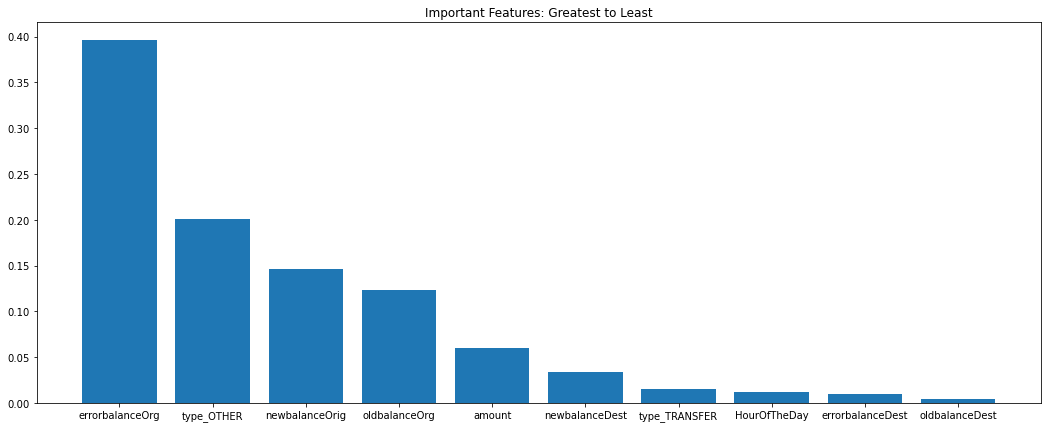

In [535]:
sort_ind = np.argsort(importances)[::-1]
plt.figure(figsize=(18,7))
plt.bar(x, importances[sort_ind])
plt.xticks(x,tuple(X.columns.values[sort_ind]))
plt.title("Important Features: Greatest to Least")
plt.show()

Let's see what happens, if we drop the last 3 features are try out XGBoost Classifier again

In [536]:
X1 = temp.drop(["isFraud", "HourOfTheDay", "errorbalanceDest", "oldbalanceDest"], axis = 1)

In [537]:
Y1 = temp.isFraud

In [538]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size = 0.2, random_state = 42)

In [539]:
scaler = StandardScaler()

In [540]:
scaler.fit(X_train1)

StandardScaler()

In [541]:
X_train1 = scaler.transform(X_train1)
X_test1 = scaler.transform(X_test1)

In [542]:
parametersXGB = {'max_depth':3, 'class_weight': "balanced", 'verbose':3, 'n_jobs':-1, 'random_state':42, 'learning_rate':0.1}
XGB1 = XGBClassifier(**parametersXGB)

In [544]:
XGB1.fit(X_train1, y_train1)

[20:14:25] WARNING: ..\src\learner.cc:541: 
Parameters: { class_weight, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:14:25] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', class_weight='balanced',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbose=3, verbosity=None)

In [546]:
pred_XGB1 = XGB1.predict(X_test1)

In [547]:
confusion_matrix(y_test, pred_XGB1)

array([[4956,    0],
       [   3, 1612]], dtype=int64)

In [548]:
log_loss(y_test, pred_XGB1)

0.015768730662720838

In [549]:
classification_report(y_test,pred_XGB1)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      4956\n           1       1.00      1.00      1.00      1615\n\n    accuracy                           1.00      6571\n   macro avg       1.00      1.00      1.00      6571\nweighted avg       1.00      1.00      1.00      6571\n'

In [550]:
fprDT, recallDT, thresholdsDT = roc_curve(y_test, pred_XGB1)

In [551]:
auc(fprDT, recallDT)

0.9990712074303405